In [81]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
rng = np.random.RandomState(0)
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
read_City_data = pd.read_csv(city_data_to_load)
read_Ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
all_data = pd.merge(read_City_data, read_Ride_data, how='inner',on='city')
# Display the data table for preview
all_data.head()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [82]:
all_data["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

## Bubble Plot of Ride Sharing Data

In [83]:
# Obtain the x and y coordinates for each of the three city types
urban_data = all_data[all_data["type"] == "Urban"].groupby([all_data["city"]])
suburban_data = all_data[all_data["type"] == "Suburban"].groupby([all_data["city"]])
rural_data = all_data[all_data["type"] == "Rural"].groupby([all_data["city"]])

# (x-axis) Count of rides based on "type"
x_urban = urban_data["ride_id"].count()
x_suburban = suburban_data["ride_id"].count()
x_rural = rural_data["ride_id"].count()

# (y-axis) fare average per city

y_urban = urban_data["fare"].mean()
y_suburban = suburban_data["fare"].mean()
y_rural = rural_data["fare"].mean()


# drivers per city
drivers_urban = urban_data["driver_count"].mean()
drivers_suburban = suburban_data["driver_count"].mean()
drivers_rural = rural_data["driver_count"].mean()




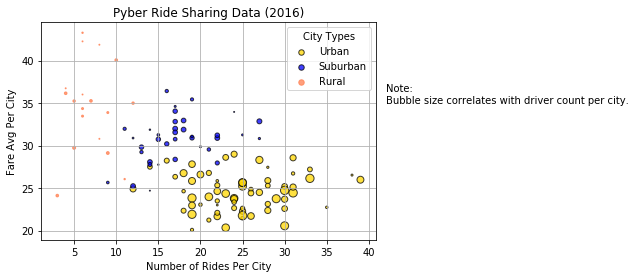

In [128]:
# Build the scatter plots for each city types
urban_plot = plt.scatter(x_urban,y_urban,s=drivers_urban, marker='o',facecolors=["gold"], edgecolor="black", alpha=.75, label="Urban", linewidths=1)
suburban_plot = plt.scatter(x_suburban,y_suburban,s=drivers_suburban, marker='o',facecolors=["blue"], edgecolor="black", alpha=.75,label="Suburban", linewidths=True)
rural_plot = plt.scatter(x_rural,y_rural,s=drivers_rural, marker='o',facecolors=["coral"], alpha=.75,label="Rural", linewidths=True)
# Incorporate the other graph properties
plt.xlabel("Number of Rides Per City")
plt.ylabel("Fare Avg Per City")
plt.title("Pyber Ride Sharing Data (2016)")

#cleaning up scatter plot
plt.grid()


# Create a legend
legend=plt.legend(title="City Types", loc="best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nBubble size correlates with driver count per city.",fontsize = 10)

# Save Figure
type_plot = plt.savefig("Pyber_Ride_Sharing_Data_2016.jpg")

#show scatter plot
plt.show()

## Total Fares by City Type

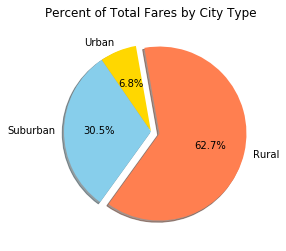

In [131]:
# Calculate Type Percents
type_grouped = all_data.groupby(['type'])
fare_sum = type_grouped['fare'].sum()

# Build Pie Chart
labels = ["Urban","Suburban","Rural"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("Percent of Total Fares by City Type")

# Save Figure
plt.savefig("Total_Fares_by_City_Type.jpg")

# Show Figure
plt.show()

In [132]:
# Show Figure
plt.show()

## Total Rides by City Type

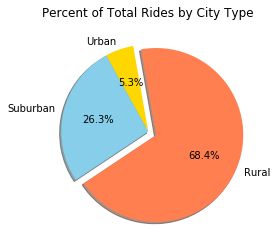

In [136]:
# Calculate Ride Percents
rides_count = type_grouped["ride_id"].count()


# Build Pie Chart
labels = ["Urban","Suburban","Rural"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("Percent of Total Rides by City Type")

# Save Figure
plt.savefig("Total_Rides_Per_City_Type")

In [137]:
# Show Figure
plt.show()

## Total Drivers by City Type

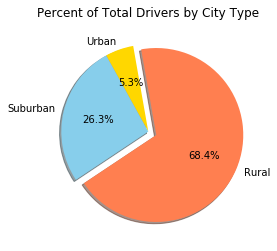

In [139]:
# Calculate Driver Percents
grouped_driver_type = all_data.groupby(["type"])
driver_sum = grouped_driver_type["driver_count"].sum()

# Build Pie Charts
labels = ["Urban","Suburban","Rural"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("Percent of Total Drivers by City Type")
# Save Figure
plt.savefig("Total Drivers by City Type.jpg")

In [140]:
# Show Figure
plt.show()